Cho tệp dữ liệu deso1.txt gồm 30 quan sát về các biến số: 
- q: lượng thịt sử dụng của hộ gia đình kg/tháng; 

- p: giá ($)/kg thịt bò 

- y: là thu nhập của hộ/tháng. 

Hãy viết code tính toán và trả lời các câu hỏi dưới đây với LẬP LUẬN ĐẦY ĐỦ, mức ý nghĩa 5%:

In [2]:
library(lmtest)
library(car)
library(carData)
library(hexView)
library(strucchange)
library(fBasics)

In [3]:
df <- read.table("de1.txt",header = TRUE)
df

p,q,y
<dbl>,<dbl>,<dbl>
10.763,11.6320,487.648
13.033,12.0290,364.877
9.244,8.9160,541.037
4.605,33.9080,760.343
13.045,4.5610,421.746
7.706,17.5940,578.214
7.405,18.8420,561.734
7.519,11.6370,301.470
8.764,7.6450,379.636


In [4]:
names(df)

[1] "p" "q" "y"

## Câu 1

Hãy cho biết khi từng biến số p và y tăng 1% thì cầu về thịt bò thay đổi bao nhiêu%? 

In [6]:
hq <- lm(data = df,log(q)~log(p)+log(y))
summary(hq)


Call:
lm(formula = log(q) ~ log(p) + log(y), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72529 -0.24963  0.00872  0.14688  0.67200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.1391     1.4077  -3.651  0.00111 ** 
log(p)       -0.5693     0.2137  -2.664  0.01285 *  
log(y)        1.4297     0.2275   6.285    1e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.392 on 27 degrees of freedom
Multiple R-squared:  0.6251,	Adjusted R-squared:  0.5973 
F-statistic: 22.51 on 2 and 27 DF,  p-value: 1.772e-06


Khi từng biến số p và y tăng 1% thì cầu về thịt bò thay đổi lượng cầu thịt bò thay đổi (1.4297-0.5693)%

## Câu 2

Hệ số có giãn của cầu theo giá bằng -1?

In [7]:
linearHypothesis(hq,c("log(p)=-1"))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,4.774200,NA,NA,NA,NA
2,27,4.149745,1,0.6244552,4.06297,0.05388568


Với mức ý nghĩa 5%, thì hệ số có giãn của cầu theo giá bằng 1

## Câu 3 

Khi giá tăng 1% và thu nhập cũng tăng 1% thì lượng cầu về thịt bò không đổi?

In [8]:
linearHypothesis(hq,c("log(p)=-log(y)"))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,5.380488,NA,NA,NA,NA
2,27,4.149745,1,1.230743,8.007734,0.008682818


Khi giá tăng 1% và thu nhập cũng tăng 1% thì lượng cầu về thịt bò thay đổi

## Câu 4

Tìm khoảng tin cậy đối xứng 95% cho tổng hai hệ số co giãn.

In [9]:
vcov(hq)

,(Intercept),log(p),log(y)
(Intercept),1.98156993,-0.079690259,-0.303604062
log(p),-0.07969026,0.045655315,-0.002479062
log(y),-0.30360406,-0.002479062,0.051742449


In [10]:
var2 <- vcov(hq)[2,2]
var3 <- vcov(hq)[3,3]
cov23 <- vcov(hq)[3,2]

se <- sqrt(var2+var3+2*cov23)
beta2 <- -0.5693
beta3 <- 1.4297

((beta2+beta3)+c(-1,1)*qt(0.975,length(df$p)-3)*se)

[1] 0.2365637 1.4842363

## Câu 5 

Tính phần dư của mình và vẽ đồ thị $e^2$ theo y và cho biết nhận xét.

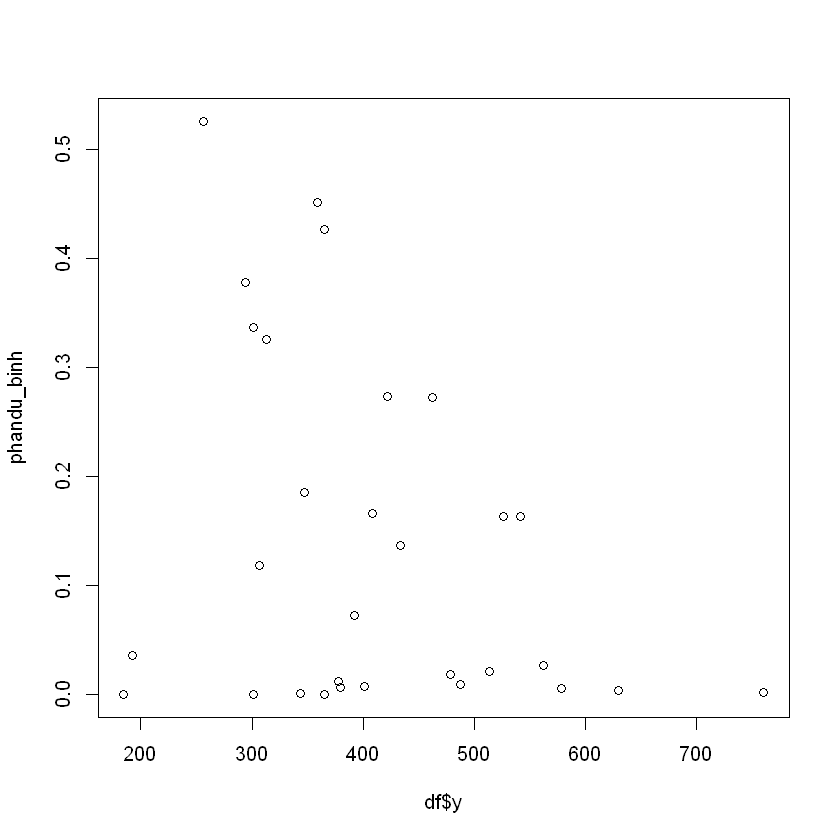

In [15]:
phandu_binh <- resid(hq)^2
plot(df$y,phandu_binh)

## Câu 7

Cho hai giá trị p và y ngoài mẫu $(p_1,y_1)=(6,520)$ và $(p_2,y_2)=(8,480)$ Hãy dự báo khoảng tin 95% cho y.

In [17]:
p <- c(6,8)
y <- c(520,480)
predic <- predict(hq,data.frame(p=p,y=y),interval="confidence",level=0.95)
predic

,fit,lwr,upr
1,2.781807,2.545146,3.018469
2,2.503593,2.327861,2.679324
